# 2.3.3 線形モデル
線形モデル：入力特徴量の**線形関数**を用いて予測を行うもの

## 2.3.3.1 線形モデルによる回帰
回帰問題における線形モデルによる一般的な予測式
```
y = w[0]*x[0]+w[1]*x[1]+・・・+w[p]*x[p]+b
# 特徴量が1つしかないとき
y = w[0]+x[0]+b
```

In [6]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
# vscode で jupyter notebookを使用したとき図の背景色をデフォルトの白にする。
import matplotlib as mpl
%matplotlib inline

mpl.style.use('default')

w[0]: 0.393906  b: -0.031804


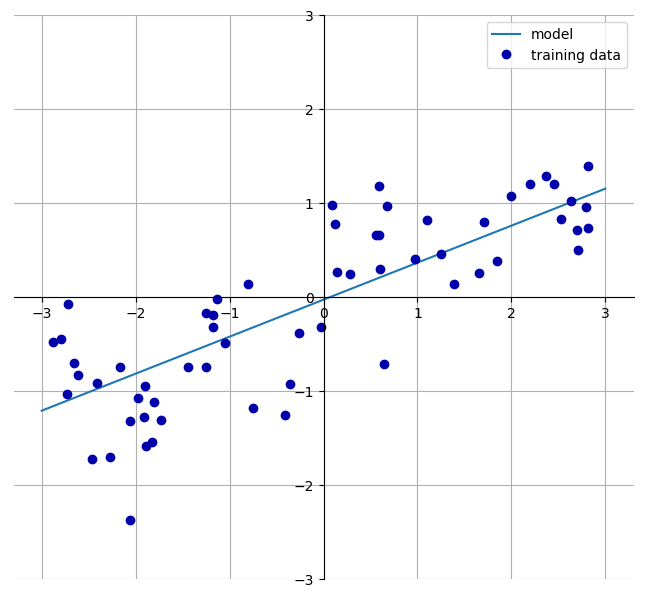

In [7]:
mglearn.plots.plot_linear_regression_wave()

- 回帰における線形モデルは、単一の特徴量に対しては予測が直線になる回帰モデルとして特徴づけられる。
- 特徴量が2つなら予測は平面に、高次元においては予測は超平面になる。

線形モデルを用いた回帰には様々なアルゴリズムがある。

「モデルの相違点」
- パラメータwとbを訓練データから学習する方法
- モデルの複雑さを制御する方法

## 2.3.3.2 線形回帰(通常最小二乗法)
**通常最小二乗法(ordinary least squares: OLS)**：最も単純で、最も古典的な線形回帰手法

- 訓練データにおいて、予測と真の回帰ターゲットyとの**平均二乗誤差**が最小になるように、パラメータwとbを求める。
- 平均二乗誤差：予測と真の値との差を二乗したものの平均値
- 線形回帰にはパラメータがなく、モデルの複雑さを制御する方法がないことを意味する。

In [9]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
# 傾きを表すパラメータw：重み(係数)と呼ばれ,coef_属性に格納される。
print('lr.coef_:{}'.format(lr.coef_))
# オフセット(切片)：intercept_属性に格納される。
print('lr.intercept_:{}'.format(lr.intercept_))
# 訓練セットに対する性能
print('Training set score:{:.2f}'.format(lr.score(X_train, y_train)))
# テストセットに対する性能
print('Test set score:{:.2f}'.format(lr.score(X_test, y_test)))

lr.coef_:[0.39390555]
lr.intercept_:-0.031804343026759746
Training set score:0.67
Test set score:0.66


- R^2が0.66というのはあまりよくない。
- 訓練セットとテストセットに対する値が非常に近い
    - 適合不足であると考えられる。
    - 1次元データセットでは、モデルがとても単純なので、過剰適合の危険は少ない。
    - 高次元のデータセットに対しては線形モデルはより強力になるので、過剰適合の可能性が高くなる。

In [11]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print('lr.coef_:{}'.format(lr.coef_))
print('lr.intercept_:{}'.format(lr.intercept_))
print('Training set score:{:.2f}'.format(lr.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(lr.score(X_test, y_test)))

lr.coef_:[-4.12710947e+02 -5.22432068e+01 -1.31898815e+02 -1.20041365e+01
 -1.55107129e+01  2.87163342e+01  5.47040992e+01 -4.95346659e+01
  2.65823927e+01  3.70620316e+01 -1.18281674e+01 -1.80581965e+01
 -1.95246830e+01  1.22025403e+01  2.98078144e+03  1.50084257e+03
  1.14187325e+02 -1.69700520e+01  4.09613691e+01 -2.42636646e+01
  5.76157466e+01  1.27812142e+03 -2.23986944e+03  2.22825472e+02
 -2.18201083e+00  4.29960320e+01 -1.33981515e+01 -1.93893485e+01
 -2.57541277e+00 -8.10130128e+01  9.66019367e+00  4.91423718e+00
 -8.12114800e-01 -7.64694179e+00  3.37837099e+01 -1.14464390e+01
  6.85083979e+01 -1.73753604e+01  4.28128204e+01  1.13988209e+00
 -7.72696840e-01  5.68255921e+01  1.42875996e+01  5.39551110e+01
 -3.21709644e+01  1.92709675e+01 -1.38852338e+01  6.06343266e+01
 -1.23153942e+01 -1.20041365e+01 -1.77243899e+01 -3.39868183e+01
  7.08999816e+00 -9.22538241e+00  1.71980268e+01 -1.27718431e+01
 -1.19727581e+01  5.73871915e+01 -1.75331865e+01  4.10103194e+00
  2.93666477e+01

- 訓練セットとテストセットで性能が大きく異なるのは、過剰適合が起きている。
- 複雑度を制御できるモデルを探さなければならない。

## 2.3.3.3 リッジ回帰
リッジ回帰
- 線形モデルによる回帰の1つ。
- 予測に用いられる式は、通常最小二乗法のものと同じ
- 係数(w)を訓練データに対する予測だけでなく、他の制約に対しても最適化する。
- 係数の絶対値の大きさを可能な限り小さくしたい＝wの要素をなるべく0に近づけたい。

⇒こうした制約条件は、**正則化**の一例である。

- 正則化：過剰適合を防ぐために明示的にモデルを制約すること。

リッジ回帰で用いられる正則化は、L2正則化と呼ばれる。

- L2正則化：wのユークリッド長に対してペナルティを与える。

In [14]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1).fit(X_train, y_train)
print('Training set score:{:.2f}'.format(ridge.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(ridge.score(X_test, y_test)))

Training set score:0.89
Test set score:0.75


Ridgeの訓練セットに対するスコアはLinearRegressionの場合よりも**低く**, テストセットに対するスコアは**高い**

- Ridgeは、制約の強いモデルなので過剰適合の危険は少ない。
- 複雑度の低いモデルは、訓練セットに対する性能は低いが汎化性能は高い。

Ridgeモデルでは、モデルの簡潔さ(0に近い係数の数)と、訓練セットに対する性能がトレードオフの関係になる。

- alphaパラメータ：どちらに重きを置くかを指定する。
- alphaを増やすと、係数はより0に近くなり、訓練セットに対する性能は低下するが、汎化には良いかもしれない。
- 最良のalphaは、データセットに依存する。

In [18]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print('Training set score:{:.2f}'.format(ridge10.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(ridge10.score(X_test, y_test)))
print('~~~~~~~~~')
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print('Training set score:{:.2f}'.format(ridge01.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(ridge01.score(X_test, y_test)))

Training set score:0.79
Test set score:0.64
~~~~~~~~~
Training set score:0.93
Test set score:0.77


- alphaを小さくすると係数の制約は小さくなる。
- alphaが非常に小さい値になると、係数への制約はほとんどなくなり、LinearRegressionと同じような挙動となる。
- alpha=0.1がうまくいっているように見える。

alphaパラメータのモデルへの影響を定量的に知るには、様々なalphaに対するモデルのcoef_属性を確認するとよい。
- alphaが大きい場合は小さい場合よりもcoef_の要素の絶対値が小さくなることが期待される。

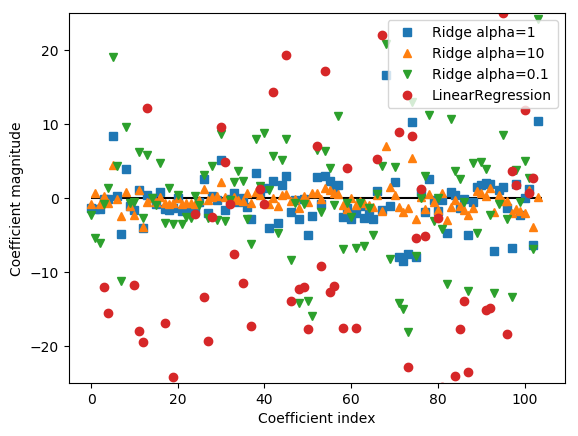

In [19]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

- x軸はcoef_の要素を表している。(x=0は最初の特徴に対する係数, x=1は2番目の特徴に対する係数, x=100まで続いている)
- y軸は特徴量に対応する係数の数値を表している。

この図からわかるのは、alpha=10ではほとんどの係数が-3から3の間に存在する。
- 正則化の影響が強く出ていることがわかる。

「正則化の影響を理解するもう１つの方法」

alphaの値を固定して、利用できる訓練データの量を変化させる。

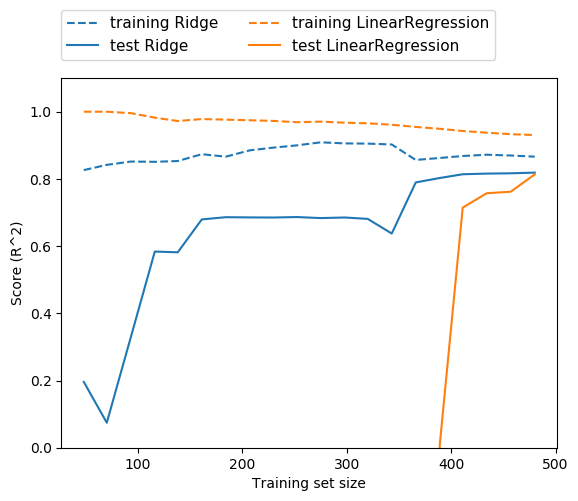

In [20]:
mglearn.plots.plot_ridge_n_samples()

#### boston_housingデータセットに対するリッジ回帰と線形回帰の学習曲線
- リッジ回帰でも線形回帰でも、訓練スコアはすべてのデータサイズにおいてテストスコアよりも高い
- リッジ回帰では正則化が行われているため、訓練スコアは線形回帰のものよりも常に低い
- テストスコアは、リッジ回帰のほうが高い。(特にデータサイズが小さい時は顕著)
- データが増えれば増えるほど双方のモデルとも性能は向上し、最後には線形回帰が追いつく。

1. 十分な訓練データがある場合には、正則化はあまり重要ではなくなる。
- 十分なデータがあるならば、リッジ回帰と線形回帰は同じ性能を示す。
2. 線形回帰では、訓練性能が低下している。
- データ量が多くなると、モデルが過剰適合する。もしくは、データを覚えてしまうことが難しくなる。

## 2.3.3.4 Lasso
Lasso
- リッジ回帰と同様に、Lassoも係数が0になるように制約をかけるが掛け方が異なる。(l1正則化)
- L1正則化：係数の絶対値の和もペナルティを与える。
- Lassoにおいては、いくつかの係数が**完全に0**になる。
- モデルにおいていくつかの特徴量が完全に無視される。(自動的に特徴量を選択していると考えてもよい)
- いくつかの係数が0になると、モデルを解釈しやすくなり、どの特徴量が重要なのかが明らかになる。

In [21]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print('Training set score:{:.2f}'.format(lasso.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(lasso.score(X_test, y_test)))
print('Number of features used:{}'.format(np.sum(lasso.coef_ != 0)))

Training set score:0.29
Test set score:0.21
Number of features used:4


- Lassoの性能は訓練セットに対しても、テストセットに対しても非常に悪い。(適合不足)
- 105の特徴量のうちのわずか4つしか使っていない。
- 適合不足の度合いを減らすためには、alphaを減らせばよい。この際に、max_iter(最大の繰り返し回数)をデフォルト値から増やす必要がある。

In [24]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print('Training set score:{:.2f}'.format(lasso001.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(lasso001.score(X_test, y_test)))
print('Number of features used:{}'.format(np.sum(lasso001.coef_ != 0)))
print('~~~~~~~~')
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print('Training set score:{:.2f}'.format(lasso00001.score(X_train, y_train)))
print('Test set score:{:.2f}'.format(lasso00001.score(X_test, y_test)))
print('Number of features used:{}'.format(np.sum(lasso00001.coef_ != 0)))

Training set score:0.90
Test set score:0.77
Number of features used:33
~~~~~~~~
Training set score:0.95
Test set score:0.64
Number of features used:96


- alphaを小さくすると、より複雑なモデルに適合するようになり、訓練データに対してもテストデータに対してもよい結果が得られている。
- alphaを小さくしすぎると、正則化の効果が薄れ、過剰適合が発生し、性能はLinearRegressionと似たようなものになる。

Text(0, 0.5, 'Coefficient magnitude')

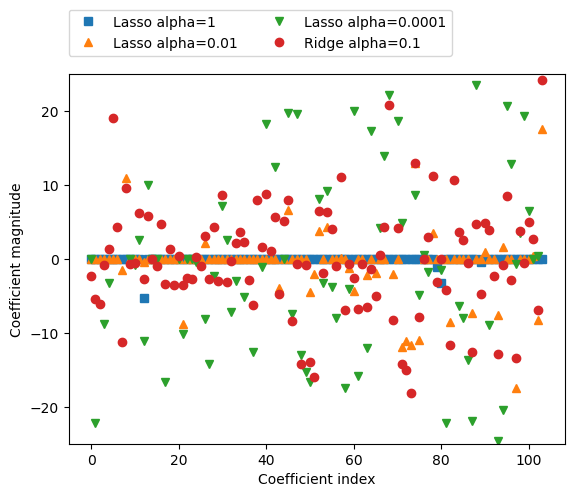

In [25]:
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')
plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')

- Lassoのalpha=1の場合は、ほとんどの係数がゼロである。
- 残りの係数の絶対値も小さい。

# 2.3.3.5 クラス分類のための線形モデル
```
y = w[0]*x[0]+w[1]*x[1]+・・・+w[p]*x[p]+b > 0
```
- 特徴量の重み付き和を単に返さず、予測された値が0を超えるかどうかで分割している。
- 決定境界が入力の線形関数になる=線形の2クラス分類器は、2つのクラスを直線や平面や超平面で分割する。

1. 係数と切片の特定の組み合わせと訓練データの適合度を測る尺度
2. 正規化を行うか。行うならどの方法を使うか。

1,2 で線形モデルを学習するアルゴリズムが区別される。
- ロジスティック回帰(logistic regression)
- 線形サポートベクタマシン(linear support vector machines:SVM)


/home/gpuadmin/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/home/gpuadmin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/gpuadmin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


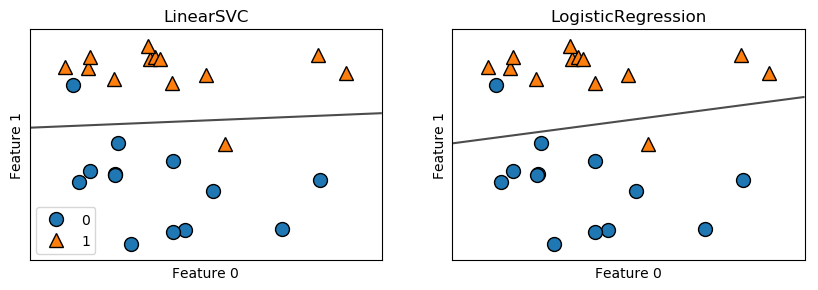

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2,figsize=(10,3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend()

- デフォルトでは、ロジスティック回帰, 線形サポートベクタマシンはL2正規化を行っている。
- 正則化の強度を決定するトレードオフパラメータはCと呼ばれ、Cが大きくなると正則化は弱くなる。
- Cを大きくすると訓練データに対しての適合度を上げようとする。
- Cを小さくすると係数ベクトル(w)を0に近づけることを重視するようになる。
- 小さいCを用いると、データポイントの**大多数**に対して適合しようとする。
- 大きいCを用いると、個々のデータポイントを正確にクラス分類することを重視するようになる。

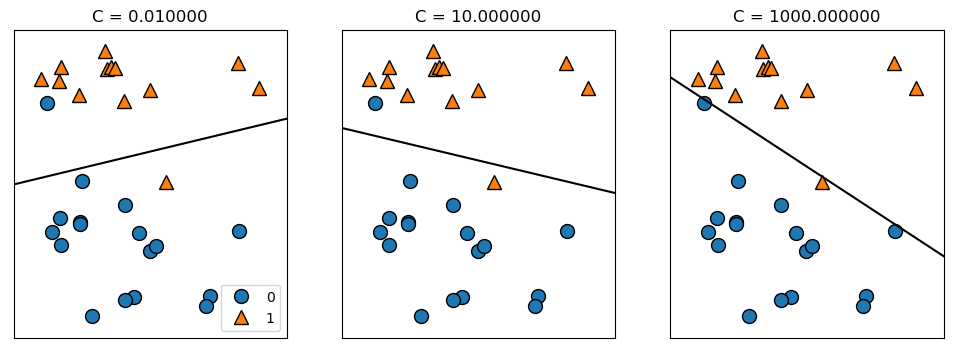

In [27]:
mglearn.plots.plot_linear_svc_regularization()

In [32]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)
print('ロジスティック回帰 C=1')
logreg = LogisticRegression().fit(X_train, y_train)
print('Training set score:{:.3f}'.format(logreg.score(X_train, y_train)))
print('Test set score:{:.3f}'.format(logreg.score(X_test, y_test)))
print('\nロジスティック回帰 C=100')
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print('Training set score:{:.3f}'.format(logreg100.score(X_train, y_train)))
print('Test set score:{:.3f}'.format(logreg100.score(X_test, y_test)))
print('\nロジスティック回帰 C=0.001')
logreg0001 = LogisticRegression(C=0.001).fit(X_train, y_train)
print('Training set score:{:.3f}'.format(logreg0001.score(X_train, y_train)))
print('Test set score:{:.3f}'.format(logreg0001.score(X_test, y_test)))

ロジスティック回帰 C=1
Training set score:0.953
Test set score:0.958

ロジスティック回帰 C=100
Training set score:0.972
Test set score:0.965

ロジスティック回帰 C=0.001
Training set score:0.923
Test set score:0.937
/home/gpuadmin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gpuadmin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gpuadmin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0, 0.5, 'Coefficient magnitude')

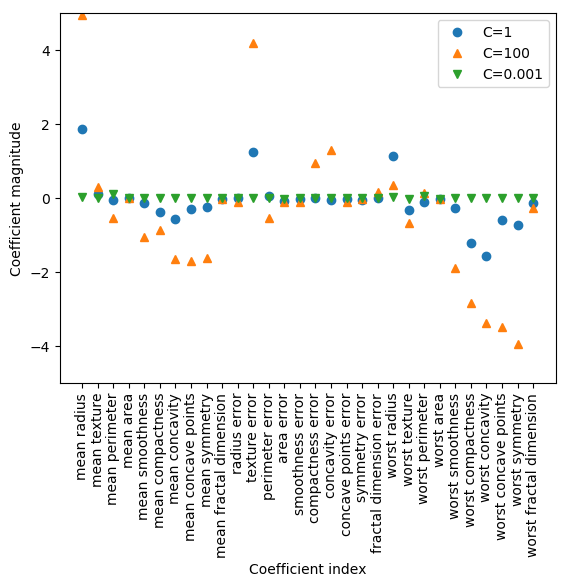

In [33]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg0001.coef_.T, 'v', label='C=0.001')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.legend()
plt.ylim(-5, 5)
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')

- デフォルトのC=1は、訓練セットテストセットの双方で95%と良い性能を示しているが、精度がとても近く適合不足の可能性が高い。
- C=100にすると訓練セット精度が向上し、テストセット精度もわずかに向上する。
- C=0.001だとC=1よりも適合不足が見られる。

「係数の解釈」
- mean perimeter(3番目)：C=100, C=1に対しては負だが、C=0.001に対しては正になっている。
    - モデルによって係数の正負が変わってしまうと、そのモデルを見るかによって、mean perimeterが大きいことが「良性」か「悪性」を示唆しているかが変わってしまう。
- texture errorが大きいことと悪性が関係あるのではないか？

⇒線形モデルの係数の解釈には常に眉につばをつけて聞かないといけない。

/home/gpuadmin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gpuadmin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
Traning accuracy of l1 logreg with C=0.001:0.91
Test accuracy of l1 logreg with C=0.001:0.92
/home/gpuadmin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/gpuadmin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
Traning accuracy of l1 logreg with C=1.000:0.

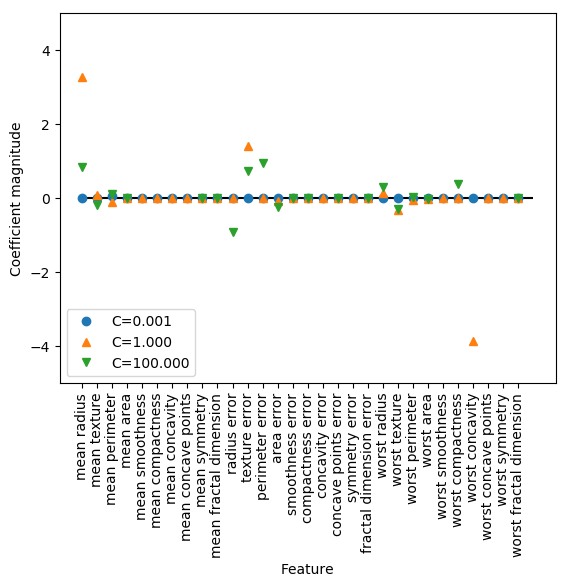

In [35]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1').fit(X_train, y_train)
    print('Traning accuracy of l1 logreg with C={:.3f}:{:.2f}'.format(
        C, lr_l1.score(X_train, y_train)
    ))
    print('Test accuracy of l1 logreg with C={:.3f}:{:.2f}'.format(
        C, lr_l1.score(X_test, y_test)
    ))
    plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.xlabel('Feature')
plt.ylabel('Coefficient magnitude')
plt.ylim(-5, 5)
plt.legend(loc=3)

- L1正規化を使うことでより解釈しやすいモデルを得た。
- 2クラス分類のための線形モデル群と回帰のための線形モデル群の間には対応がある。
- penaltyパラメータがモデルの正規化と、特徴量をすべて使うか一部しか使わないかに影響を与える。

## 2.3.3.6 線形モデルによる多クラス分類
- 多くの線形クラス分類モデルは、2クラスにしか適用できず、自然に多クラスの場合に拡張できるものではない。(ロジスティック回帰は例外)

2クラス分類アルゴリズムに拡張する一般的な手法に**1対その他(one-vs-rest)**アプローチがある。
- 各クラスに対してそのクラスと他のすべてのクラスを分類する2クラス分類モデルを学習する。
- 予測の際にはすべての2クラス分類器をテストデータポイントに対して実行する。
- 一番高いスコアのクラス分類器が「勝ち」、その分類器に知王するクラスが予測結果となる。
- 1クラスにつき1つの2クラス分類器があり、クラスごとに係数ベクトル(w)と切片(b)がある。

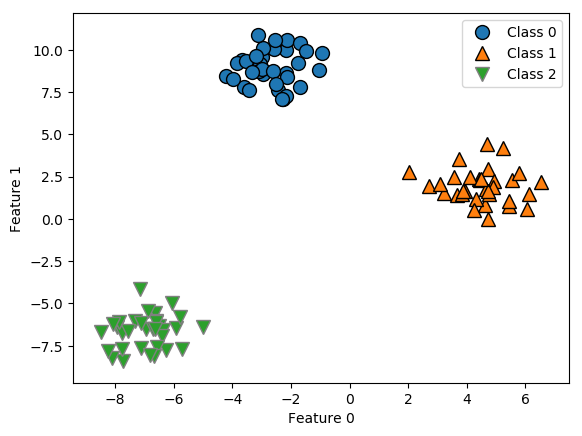

In [36]:
# 各クラスをガウス分布でサンプリングした2次元データセットを用いる。
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class 1', 'Class 2'])

In [37]:
linear_svm = LinearSVC().fit(X, y)
# 各クラスに対応する係数ベクトルが入っており、各列には個々の特徴量に対応する係数が格納される。
print('Coefficient shape:', linear_svm.coef_.shape)
# 各クラスに対する切片が格納されている。
print('Intercept shape:', linear_svm.intercept_.shape)

Coefficient shape: (3, 2)
Intercept shape: (3,)


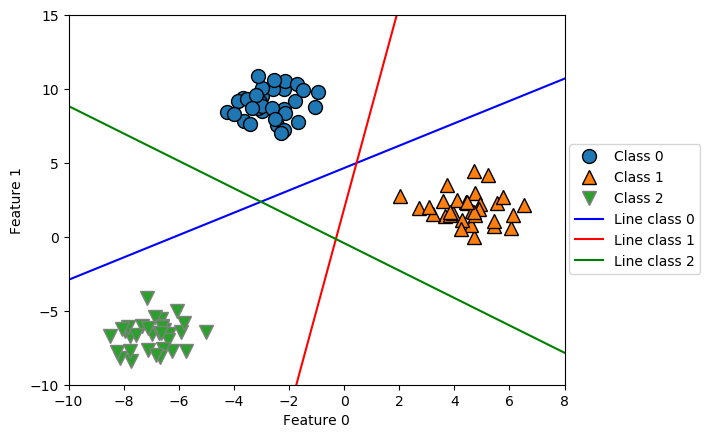

In [38]:
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0','Class 1','Class 2', 'Line class 0', 'Line class 1', 'Line class 2'],loc=(1.01, 0.3))

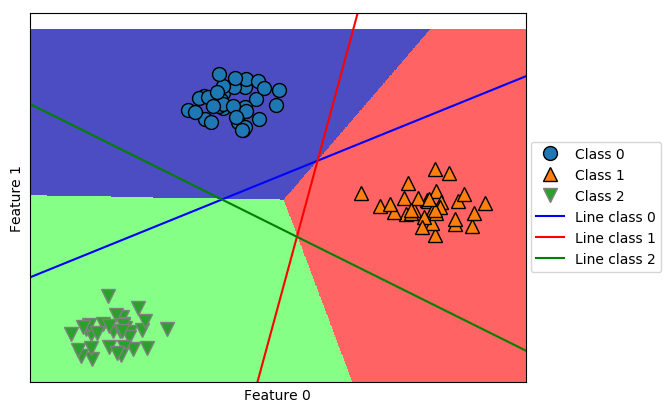

In [39]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0','Class 1','Class 2', 'Line class 0', 'Line class 1', 'Line class 2'],loc=(1.01, 0.3))

## 2.3.3.7 利点, 欠点, パラメータ
「線形モデルの主要なパラメータ」
- 回帰モデルではalpha 
- LinearSVC, LogisticRegressionではC(正則化パラメータ)
    - 調整する際には対数スケールで値を変更するのが一般的
    - L1正則化かL2正則化を使うかも重要
    - 一部の特徴量だけが重要だと思えばL1, そうでなければL2
「利点」
- 予測手法が比較的理解しやすい
- 特徴量の数がサンプルの個数よりも多いときに性能を発揮する。
    - 低次元空間では、他のモデルのほうが汎化性能を示すこともある。(2.3.7カーネル法を用いたサポートベクタマシンで示す。)   
- 非常に大きいデータセットにも適用できる。
    - solver='sag'オプションを使うことを検討したほうが良い。デフォルトよりも高速な場合がある。
    - SGDClassifierクラス, SGDRegressorクラスを使う方法（大規模なデータに適した線形モデルを実装している。）

# 2.3.4 ナイーブベイズクラス分類器
ナイーブベイズクラス分類器：特徴ベクトル間に条件付き独立性を仮定したベイズ定理に基づく分類器
- 独立性仮定によって計算量を簡素化・削減し、高速でそこそこの精度を誇る分類器を実装することができる。

「ベイズの定理」
$$P(A|B) = \frac{P(B|A) P(A)} {P(B)}$$

「正規分布を仮定する場合」
- 連続変数 x に正規分布 (ガウシアン分布) を仮定する場合、平均を μ 分散を σ^2 とすると分布
- 任意の連続値データを適用できる。
$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$


In [53]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
X = np.array([[1,2,3,4,5,6,7,8],
              [1,1,3,4,5,6,6,7],
              [2,1,2,4,5,8,8,8]])
y = np.array([1, 2, 3])
t = np.array([[2,2,4,5,6,8,8,8]])
gnb = GaussianNB()
gnb.fit(X,y)
print('予測結果：',gnb.predict(t))

予測結果： [3]


「ベルヌーイ分布を仮定する」
- 特徴が 0 と 1 で表されるようなベクトルについてはベルヌーイ分布を仮定
- 2値データを仮定している。
$$P(x_i \mid y) = P(i \mid y) x_i + (1 - P(i \mid y)) (1 - x_i)$$



In [58]:
from sklearn.naive_bayes import BernoulliNB
X = np.random.randint(2, size=(6, 100))
y = np.array([1, 2, 3, 4, 4, 5])
clf = BernoulliNB()
clf.fit(X, y)
print('予測結果：', clf.predict(X[2:3]))

予測結果： [3]


[scikit-learn によるナイーブベイズ分類器](https://qiita.com/ynakayama/items/ca3f5e9d762bbd50ad1f)を参考

[1.9. Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)を参考